In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

#### Read in both Training CSV and Test CSV for Kaggle

In [2]:
modelnum = 'five'

In [3]:
# read in Training csv
df = pd.read_csv('../datasets/train.csv')
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,...,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,...,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,...,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,...,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,...,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [4]:
# Read in Test CSV for Kaggle
df_test = pd.read_csv('../datasets/test.csv')
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,908,1020,0,Grvl,4,2fmCon,TA,No,0,0,...,WD,0,Pave,9,1020,AllPub,0,1910,1950,2006
1,1967,0,0,NaN,6,Duplex,TA,No,0,0,...,WD,0,Pave,10,1967,AllPub,170,1977,1977,2006
2,664,832,0,NaN,3,1Fam,Gd,Av,1,0,...,New,0,Pave,7,654,AllPub,100,2006,2006,2006
3,968,0,0,NaN,2,1Fam,TA,No,0,0,...,WD,0,Pave,5,968,AllPub,0,1923,2006,2007
4,1394,0,0,NaN,3,1Fam,TA,No,1,0,...,WD,185,Pave,6,1394,AllPub,0,1963,1963,2009


### Useful for EDA

In [5]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

#### Data Cleaning & EDA

In [6]:
# Engineer columns on df

df['Garage Area'].fillna(0, inplace=True)
df['Garage Cars'].fillna(0, inplace=True)
df['Yr Built or Remod'] = df['Year Remod/Add'] * df['Year Built']
df['Overall Qual Sq'] = (df['Overall Qual']**2)
df['Garage Total'] = df['Garage Area'] * df['Garage Cars']
df['SQRT 1st SQ'] = (df['1st Flr SF']**0.5)
df['Overall Qual Living Area'] = df['Overall Qual'] * df['Gr Liv Area']

# Engineer columns on df_test

df_test['Garage Area'].fillna(0, inplace=True)
df_test['Garage Cars'].fillna(0, inplace=True)
df_test['Yr Built or Remod'] = df_test['Year Remod/Add'] * df_test['Year Built']
df_test['Overall Qual Sq'] = (df_test['Overall Qual']**2)
df_test['Garage Total'] = df_test['Garage Area'] * df_test['Garage Cars']
df_test['SQRT 1st SQ'] = (df_test['1st Flr SF']**0.5)
df_test['Overall Qual Living Area'] = df_test['Overall Qual'] * df['Gr Liv Area']

In [7]:
features = ['Yr Built or Remod','Overall Qual Sq', 'Garage Total', 'SQRT 1st SQ', 'Overall Qual Living Area']

X = df[features]
y = df['SalePrice']

In [8]:
# Fitting polynomial model to Training data

poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)
poly_columns = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [9]:
# Fitting polynomial model to Testing data

features_test = ['Yr Built or Remod', 'Overall Qual Sq', 'Garage Total', 'SQRT 1st SQ', 'Overall Qual Living Area']

X_before_test = df_test[features_test]

poly = PolynomialFeatures(include_bias=False)
X_poly_test = poly.fit_transform(X_before_test)
X_poly_test_df = pd.DataFrame(X_poly_test, columns=poly.get_feature_names(features_test))
featpoly = list(X_poly_test_df)

X_after_test = X_poly_test_df[featpoly]

X_poly_test_df['Id'] = df_test['Id']
X_poly_test_df.head()

,Yr Built or Remod,Overall Qual Sq,Garage Total,SQRT 1st SQ,Overall Qual Living Area,Yr Built or Remod^2,Yr Built or Remod Overall Qual Sq,Yr Built or Remod Garage Total,Yr Built or Remod SQRT 1st SQ,Yr Built or Remod Overall Qual Living Area,Overall Qual Sq^2,Overall Qual Sq Garage Total,Overall Qual Sq SQRT 1st SQ,Overall Qual Sq Overall Qual Living Area,Garage Total^2,Garage Total SQRT 1st SQ,Garage Total Overall Qual Living Area,SQRT 1st SQ^2,SQRT 1st SQ Overall Qual Living Area,Overall Qual Living Area^2,Id
0,3724500.0,36.0,440.0,30.133038,8874.0,1.387190e+13,134082000.0,1.638780e+09,1.122305e+08,3.305121e+10,1296.0,15840.0,1084.789380,319464.0,193600.0,13258.536873,3904560.0,908.0,267400.582288,78747876.0,2658
1,3908529.0,25.0,1160.0,44.350874,10610.0,1.527660e+13,97713225.0,4.533894e+09,1.733467e+08,4.146949e+10,625.0,29000.0,1108.771843,265250.0,1345600.0,51447.013519,12307600.0,1967.0,470562.770202,112572100.0,2718
2,4024036.0,49.0,852.0,25.768197,7399.0,1.619287e+13,197177764.0,3.428479e+09,1.036922e+08,2.977384e+10,2401.0,41748.0,1262.641675,362551.0,725904.0,21954.504230,6303948.0,664.0,190658.892958,54745201.0,2414
3,3857538.0,25.0,960.0,31.112698,7220.0,1.488060e+13,96438450.0,3.703236e+09,1.200184e+08,2.785142e+10,625.0,24000.0,777.817459,180500.0,921600.0,29868.190437,6931200.0,968.0,224633.682247,52128400.0,1989
4,3853369.0,36.0,1028.0,37.336309,8670.0,1.484845e+13,138721284.0,3.961263e+09,1.438706e+08,3.340871e+10,1296.0,37008.0,1344.107139,312120.0,1056784.0,38381.726069,8912760.0,1394.0,323705.802543,75168900.0,625


#### Correlations and pairplots for use in Feature Engineering

In [10]:
df.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice                   1.000000
Overall Qual Living Area    0.837152
Overall Qual Sq             0.825539
Overall Qual                0.800207
Gr Liv Area                 0.697038
Garage Total                0.690596
Garage Area                 0.649897
Garage Cars                 0.647781
Total Bsmt SF               0.628925
Yr Built or Remod           0.622283
Name: SalePrice, dtype: float64

#### Modeling

In [11]:
# Instantiate the model

lr = LinearRegression()

In [12]:
X = poly_columns[featpoly]

In [13]:
# Train, Test, Split

X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=42)

In [14]:
# Fit the model

lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# Train Score

lr.score(X_train, y_train)

0.8681988523233635

In [16]:
# Test Score

lr.score(X_validate, y_validate)

0.8758338432731522

In [17]:
# Cross-Val-score

cross_val_score(lr, X_train, y_train).mean()

0.8517008283763454

#### Predictions

In [18]:
preds_val = lr.predict(X_validate)
preds_val;

In [19]:
# RMSE Scores
np.sqrt(metrics.mean_squared_error(y_validate, preds_val))

27611.288868332584

In [20]:
preds_train = lr.predict(X_train)
preds_train

array([189269.9312625 , 217986.55357064, 115496.22120666, ...,
       174867.97526776, 100425.58396883, 224771.12206101])

In [21]:
# RMSE Scores
np.sqrt(metrics.mean_squared_error(y_train, preds_train))

28871.76863977613

In [22]:
# Residuals
residuals = y_validate - preds_val

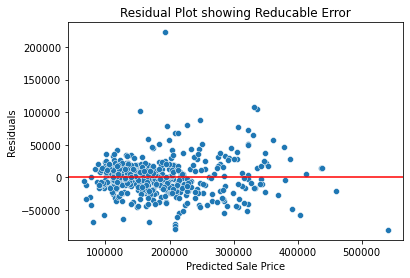

In [23]:
# Plot residuals to evaluate Epsilon (irreducable error)

plt.axhline(y=0, color='r')
sns.scatterplot(x = preds_val, y = residuals)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot showing Reducable Error');

-99.88462701117344

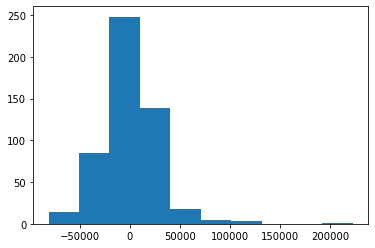

In [24]:
# Hist of residuals
plt.hist(residuals)
residuals.mean()

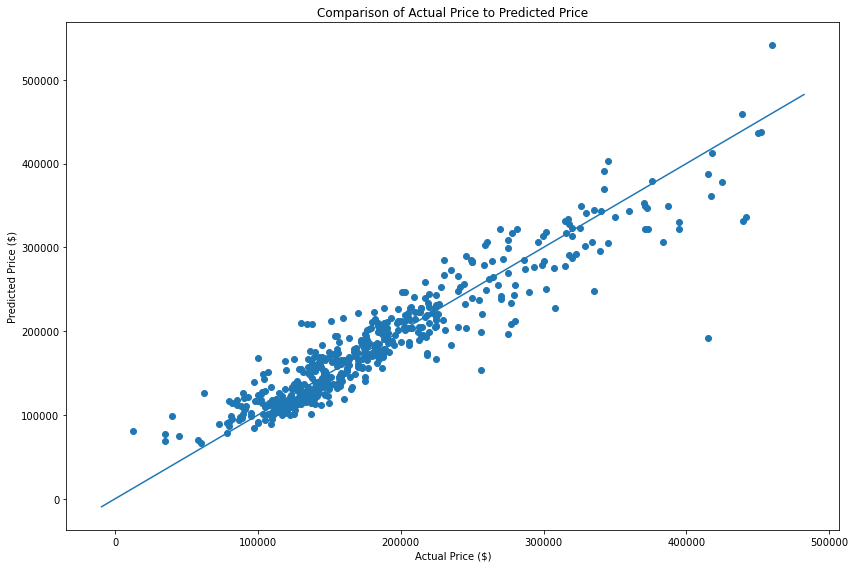

In [25]:
# Actuals vs Predicted
plt.figure(figsize = (12, 8))
plt.scatter(x = y_validate, y = preds_val)
plt.title('Comparison of Actual Price to Predicted Price')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.tight_layout();

#### Modify Test Using Poly from Above

In [26]:
test_preds = lr.predict(X_poly_test_df[featpoly])
test_preds;

In [27]:
# Create target column (SalePrice) in X_poly_test_df
X_poly_test_df['SalePrice'] = test_preds

kaggle_submission = X_poly_test_df[['Id', 'SalePrice']]

In [28]:
kaggle_submission.set_index('Id', inplace=True)
kaggle_submission.head()

,SalePrice
Id,
2658,126620.341954
2718,190054.146542
2414,122823.817591
1989,142294.457097
625,171061.953494


In [29]:
# Save Kaggle Submission to CSV

kaggle_submission.to_csv(f'../kaggle_submissions/model_{modelnum}.csv')

In [30]:
# Save df to CSV

df[features].to_csv(f'../clean_data/model_{modelnum}.csv', index=0)